In [407]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [408]:
walk_accelerometer_df = pd.read_csv('C:/Users/nkova/Lab3/walk/Accelerometer.csv')
walk_gyroscope_df = pd.read_csv('C:/Users/nkova/Lab3/walk/Gyroscope.csv')

run_accelerometer_df = pd.read_csv('C:/Users/nkova/Lab3/run/Accelerometer.csv')
run_gyroscope_df = pd.read_csv('C:/Users/nkova/Lab3/run/Gyroscope.csv')

squatting_accelerometer_df = pd.read_csv('C:/Users/nkova/Lab3/squatting/Accelerometer.csv')
squatting_gyroscope_df = pd.read_csv('C:/Users/nkova/Lab3/squatting/Gyroscope.csv')

In [409]:
def analyze_frequency_stability(data):
    time_diff = data['seconds_elapsed'].diff().dropna()
    mean_time_diff = time_diff.mean()
    expected_frequency = 1 / 30
    
    print("Mean time:", mean_time_diff)
    print("Expected time for 30 Hz:", expected_frequency)
    
    if abs(mean_time_diff - expected_frequency) < 0.001:
        print("Frequency is stable.")
    else:
        print("Frequency is unstable.")


print("Accelerometer Frequency Analysis:")
analyze_frequency_stability(walk_accelerometer_df)
analyze_frequency_stability(run_accelerometer_df)
analyze_frequency_stability(squatting_gyroscope_df)


print("Gyroscope Frequency Analysis:")
analyze_frequency_stability(walk_gyroscope_df)
analyze_frequency_stability(run_gyroscope_df)
analyze_frequency_stability(squatting_gyroscope_df)

Accelerometer Frequency Analysis:
Mean time: 0.05724120389896305
Expected time for 30 Hz: 0.03333333333333333
Frequency is unstable.
Mean time: 0.05789883060896864
Expected time for 30 Hz: 0.03333333333333333
Frequency is unstable.
Mean time: 0.04075680824335027
Expected time for 30 Hz: 0.03333333333333333
Frequency is unstable.
Gyroscope Frequency Analysis:
Mean time: 0.04002754080877359
Expected time for 30 Hz: 0.03333333333333333
Frequency is unstable.
Mean time: 0.04000948392798739
Expected time for 30 Hz: 0.03333333333333333
Frequency is unstable.
Mean time: 0.04075680824335027
Expected time for 30 Hz: 0.03333333333333333
Frequency is unstable.


In [410]:
def analyze_anomalies(data, sensor_name):
    print(f"Analyzing {sensor_name} data for anomalies.")
    for axis in ['x', 'y', 'z']:
        mean = data[axis].mean()
        std = data[axis].std()
        threshold = 3 * std
        anomalies = data[(data[axis] > mean + threshold) | (data[axis] < mean - threshold)]
        
        print(f"\n{sensor_name} {axis.upper()}-axis:")
        print(f"Mean: {mean}")
        print(f"Standard Deviation: {std}")
        print(f"Threshold for anomalies: {threshold}")
        print(f"Number of anomalies: {len(anomalies)}")



analyze_anomalies(walk_accelerometer_df, "walk_accelerometer_df")
analyze_anomalies(walk_gyroscope_df, "walk_gyroscope_df")
analyze_anomalies(run_accelerometer_df, "run_accelerometer_df")
analyze_anomalies(run_gyroscope_df, "run_gyroscope_df")
analyze_anomalies(squatting_accelerometer_df, "squatting_accelerometer_df")
analyze_anomalies(squatting_gyroscope_df, "squatting_gyroscope_df")

Analyzing walk_accelerometer_df data for anomalies.

walk_accelerometer_df X-axis:
Mean: 0.746334705946535
Standard Deviation: 2.983069613106829
Threshold for anomalies: 8.949208839320487
Number of anomalies: 2

walk_accelerometer_df Y-axis:
Mean: -0.9282074718530584
Standard Deviation: 3.1762192328572922
Threshold for anomalies: 9.528657698571877
Number of anomalies: 0

walk_accelerometer_df Z-axis:
Mean: 0.8015011419647661
Standard Deviation: 2.1569115678516755
Threshold for anomalies: 6.470734703555026
Number of anomalies: 19
Analyzing walk_gyroscope_df data for anomalies.

walk_gyroscope_df X-axis:
Mean: -0.11083945925770898
Standard Deviation: 1.062044127066018
Threshold for anomalies: 3.1861323811980538
Number of anomalies: 27

walk_gyroscope_df Y-axis:
Mean: 0.06180672288451394
Standard Deviation: 0.7480683289349298
Threshold for anomalies: 2.2442049868047893
Number of anomalies: 57

walk_gyroscope_df Z-axis:
Mean: -0.023085082237694652
Standard Deviation: 1.2413293120235989
Thr

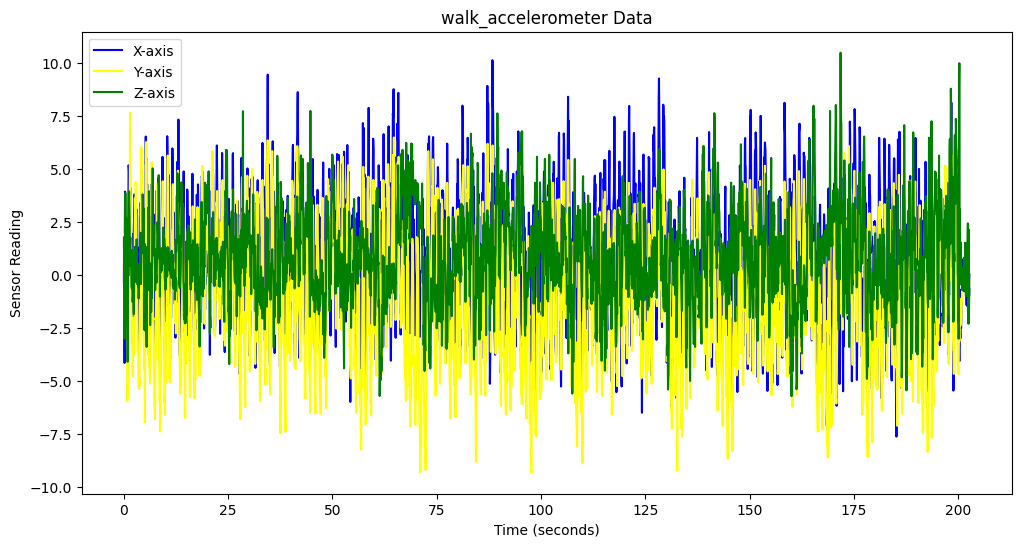

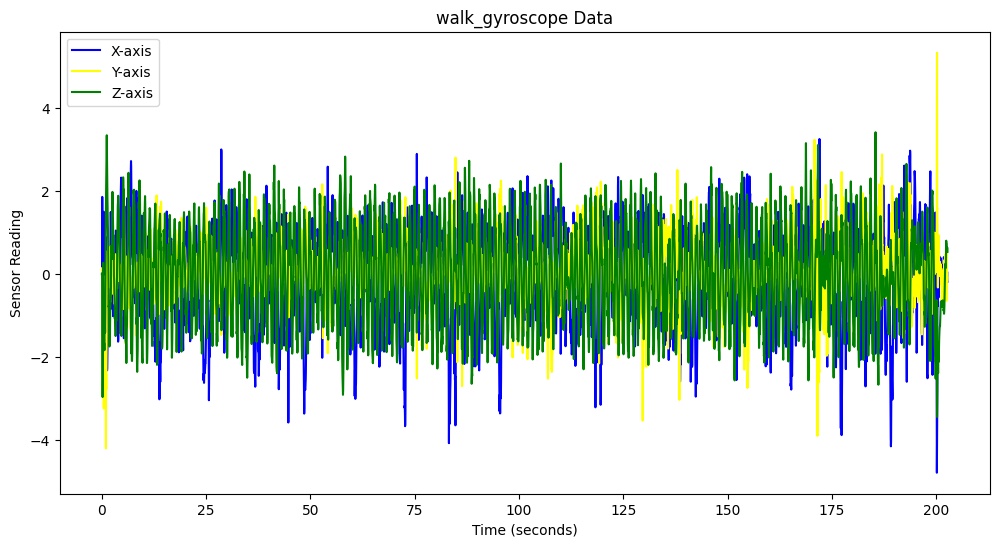

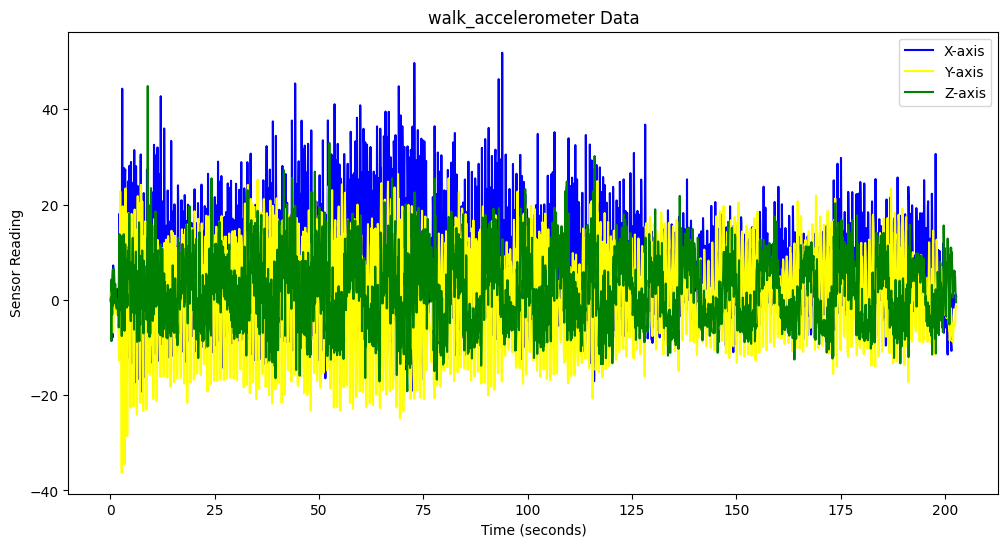

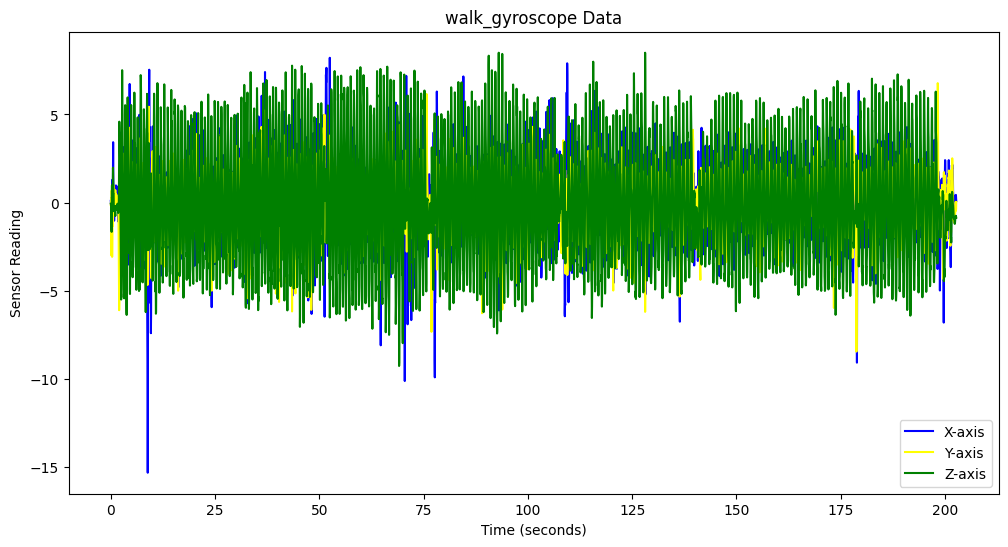

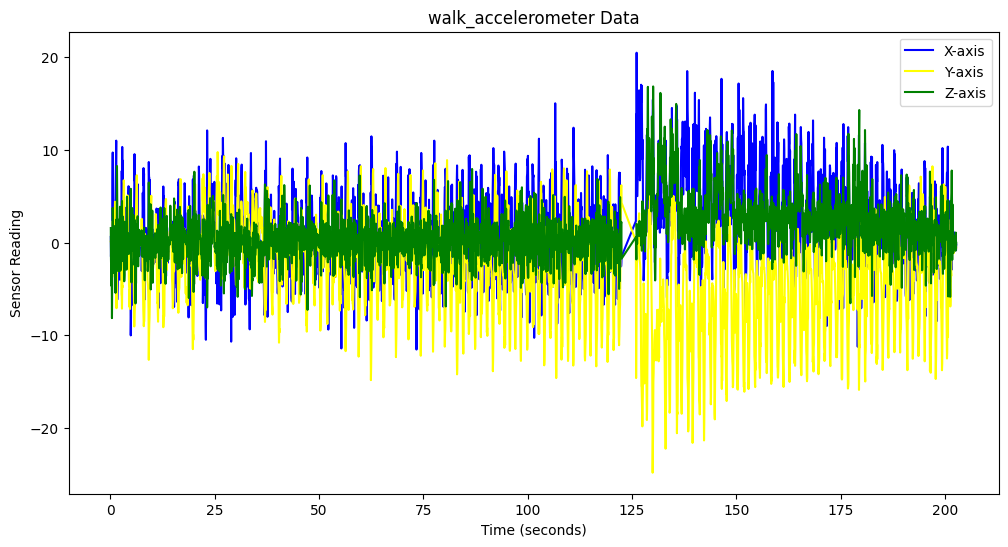

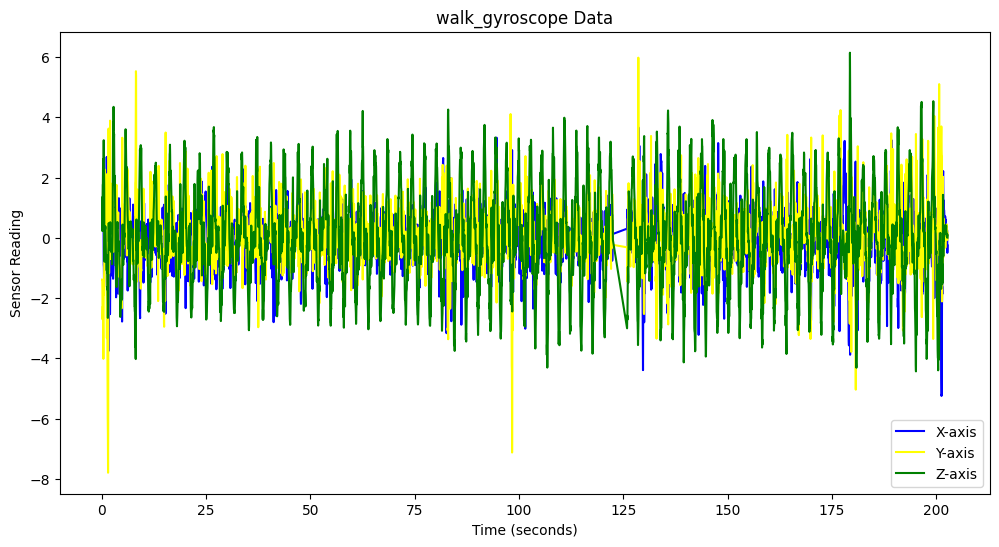

In [411]:
def plot_sensor_data(data, sensor_name):
    plt.figure(figsize=(12, 6))
    plt.plot(data['seconds_elapsed'], data['x'], label='X-axis', color='blue')
    plt.plot(data['seconds_elapsed'], data['y'], label='Y-axis', color='yellow')
    plt.plot(data['seconds_elapsed'], data['z'], label='Z-axis', color='green')
    plt.title(f'{sensor_name} Data')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Sensor Reading')
    plt.legend()
    plt.show()

plot_sensor_data(walk_accelerometer_df, 'walk_accelerometer')
plot_sensor_data(walk_gyroscope_df, 'walk_gyroscope')
plot_sensor_data(run_accelerometer_df, 'walk_accelerometer')
plot_sensor_data(run_gyroscope_df, 'walk_gyroscope')
plot_sensor_data(squatting_accelerometer_df, 'walk_accelerometer')
plot_sensor_data(squatting_gyroscope_df, 'walk_gyroscope')

In [412]:
def split_into_windows(data, window_duration=2):
    sampling_rate = 1 / data['seconds_elapsed'].diff().mean()
    samples_per_window = int(window_duration * sampling_rate)
    windows = []
    num_windows = len(data) // samples_per_window
    for i in range(num_windows):
        window = data[i * samples_per_window:(i + 1) * samples_per_window]
        windows.append(window)
    return windows

walk_accelerometer_windows = split_into_windows(walk_accelerometer_df)
walk_gyroscope_windows = split_into_windows(walk_gyroscope_df)
run_accelerometer_windows = split_into_windows(run_accelerometer_df)
run_gyroscope_windows = split_into_windows(run_gyroscope_df)
squatting_accelerometer_windows = split_into_windows(squatting_accelerometer_df)
squatting_gyroscope_windows = split_into_windows(squatting_gyroscope_df)

In [413]:
def calculate_statistics(window):
    statistics = {}
    for axis in ['x', 'y', 'z']:
        axis_data = window[axis]
        statistics[f'mean_{axis}'] = np.mean(axis_data)
        statistics[f'std_{axis}'] = np.std(axis_data)
        statistics[f'min_{axis}'] = np.min(axis_data)
        statistics[f'max_{axis}'] = np.max(axis_data)
        statistics[f'range_{axis}'] = np.max(axis_data) - np.min(axis_data)
    return statistics

def calculate_window_statistics(window_list):
    statistics_list = []
    for window in window_list:
        window_statistics = calculate_statistics(window)
        statistics_list.append(window_statistics)
    return pd.DataFrame(statistics_list)


walk_accelerometer_statistics = calculate_window_statistics(walk_accelerometer_windows)
walk_gyroscope_statistics = calculate_window_statistics(walk_gyroscope_windows)

run_accelerometer_statistics = calculate_window_statistics(run_accelerometer_windows)
run_gyroscope_statistics = calculate_window_statistics(run_gyroscope_windows)

squat_accelerometer_statistics = calculate_window_statistics(squatting_accelerometer_windows)
squat_gyroscope_statistics = calculate_window_statistics(squatting_gyroscope_windows)

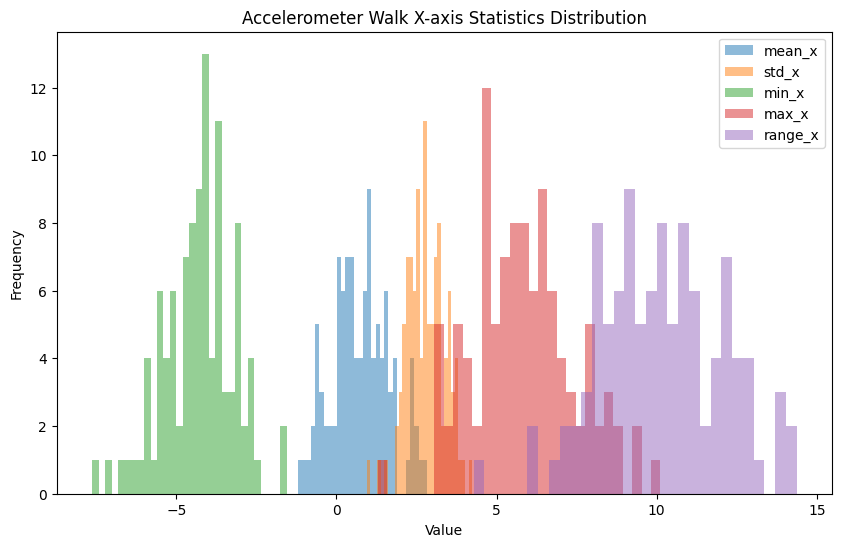

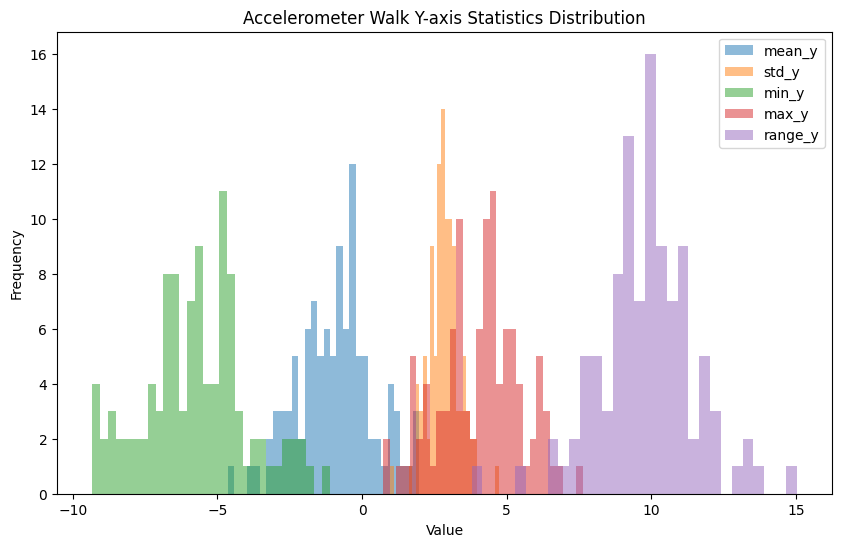

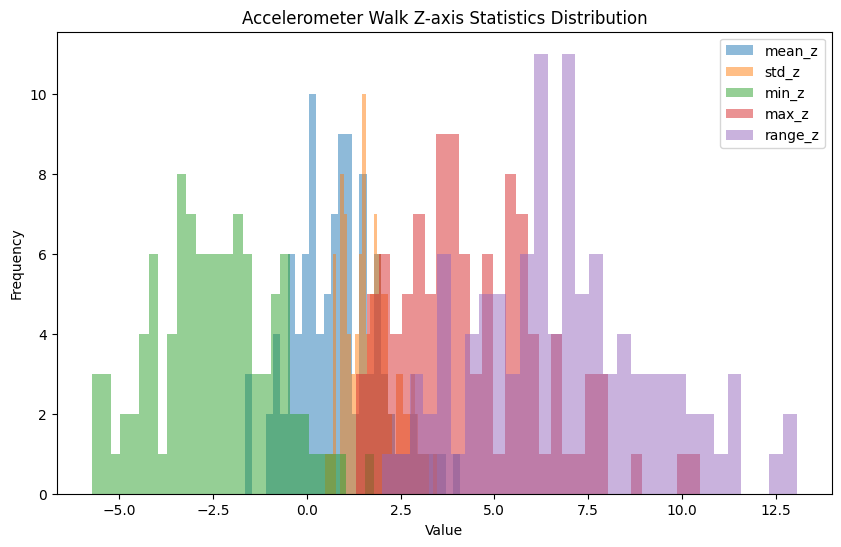

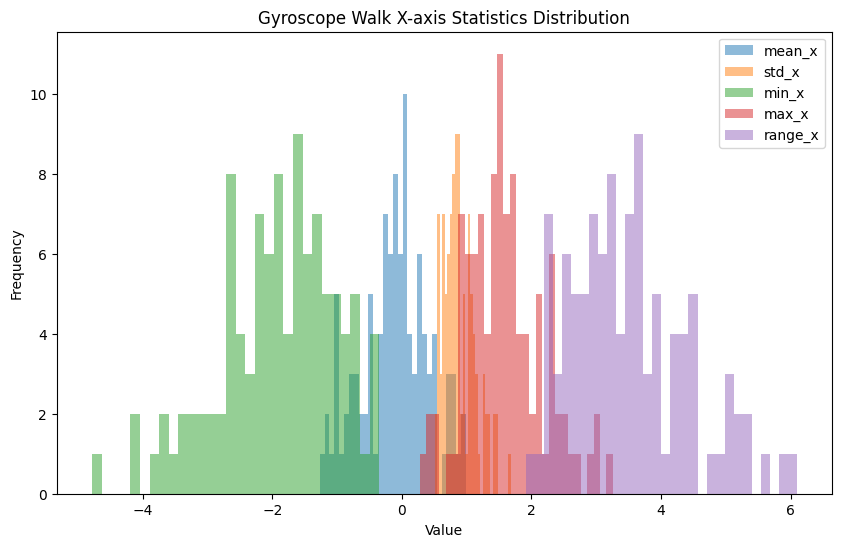

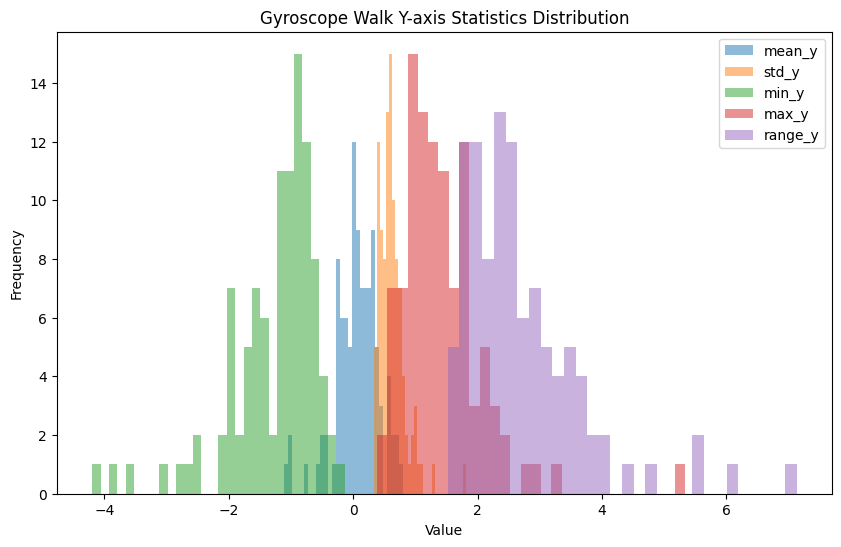

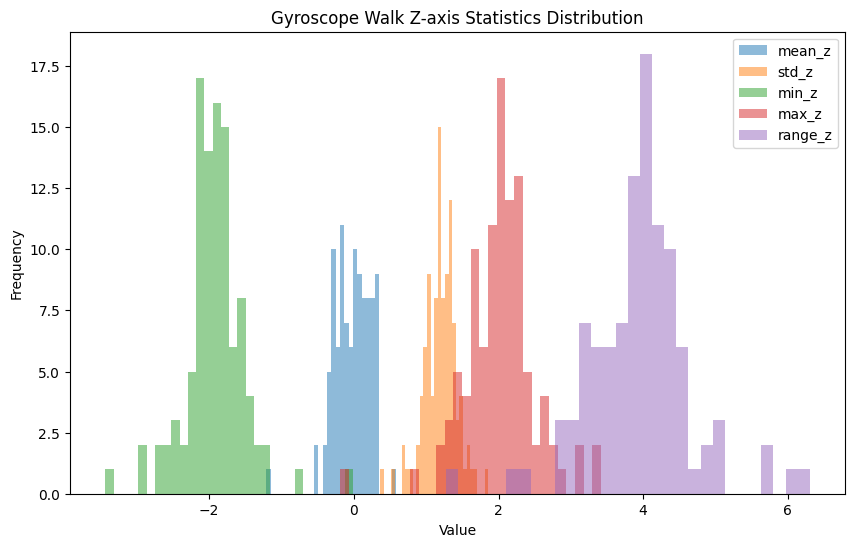

In [414]:
def plot_distribution_statistics(statistics_df, activity_name, sensor_type):
    for axis in ['x', 'y', 'z']:
        plt.figure(figsize=(10, 6))
        for stat in ['mean', 'std', 'min', 'max', 'range']:
            plt.hist(statistics_df[f'{stat}_{axis}'], bins=30, alpha=0.5, label=f'{stat}_{axis}')
        plt.title(f'{sensor_type} {activity_name} {axis.upper()}-axis Statistics Distribution')
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        plt.legend()
        plt.show()

# Побудова розподілів для кожної активності
plot_distribution_statistics(walk_accelerometer_statistics, 'Walk', 'Accelerometer')
plot_distribution_statistics(walk_gyroscope_statistics, 'Walk', 'Gyroscope')

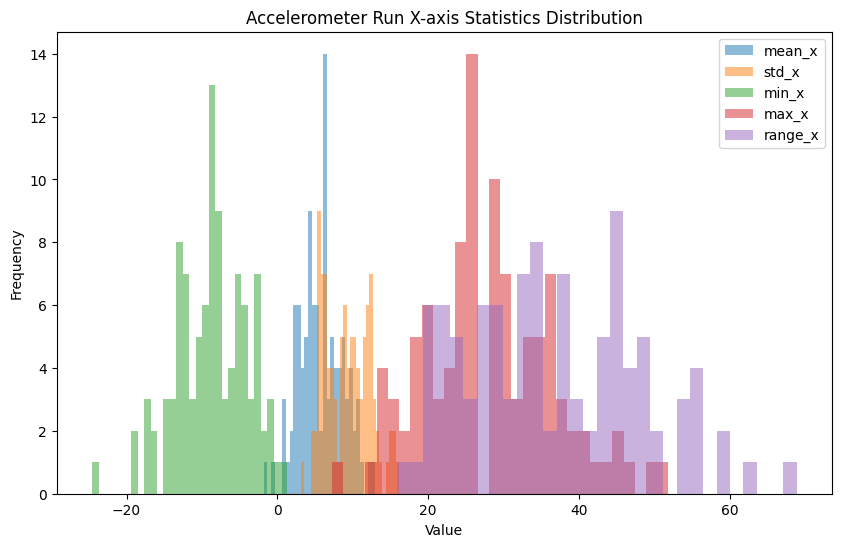

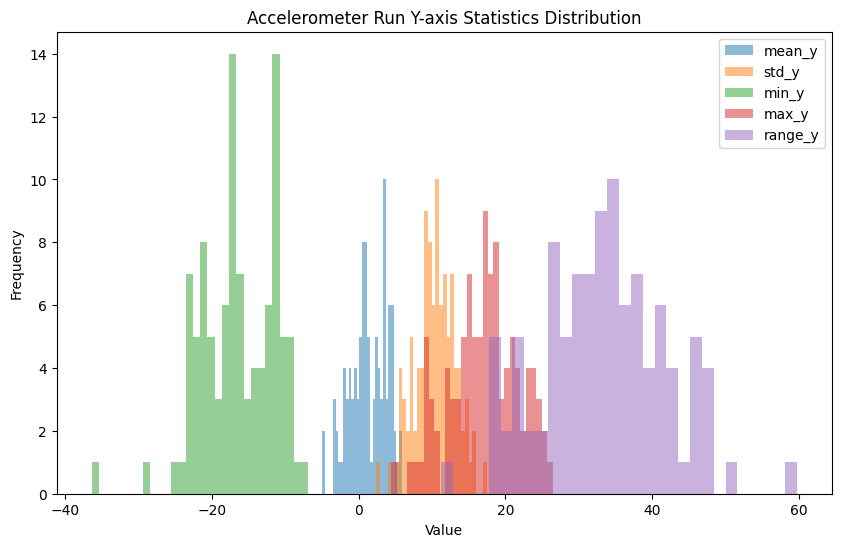

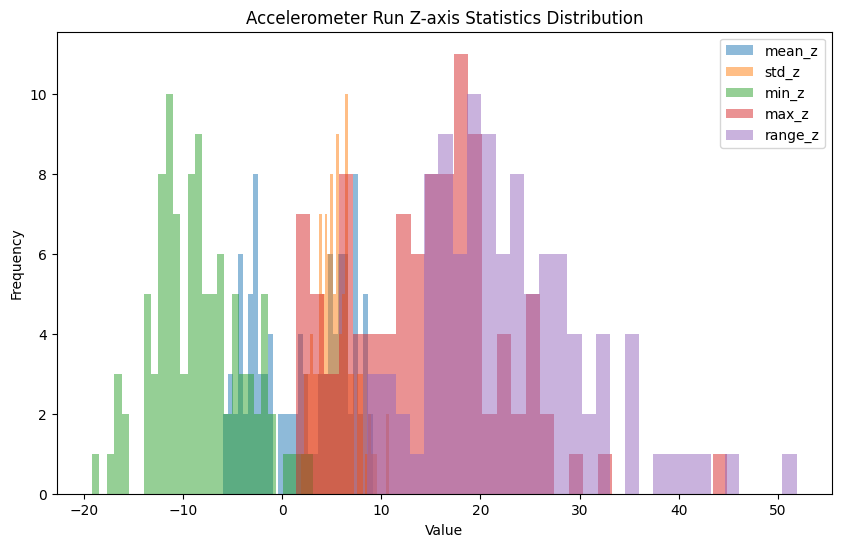

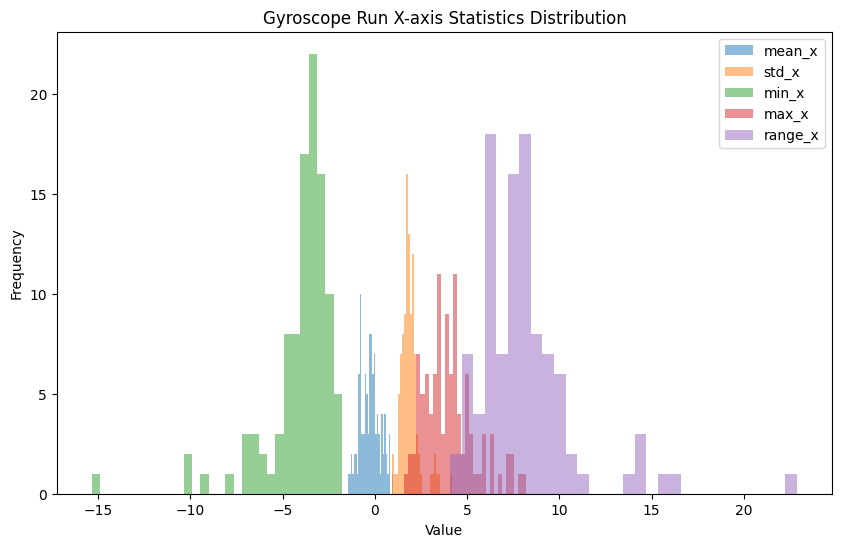

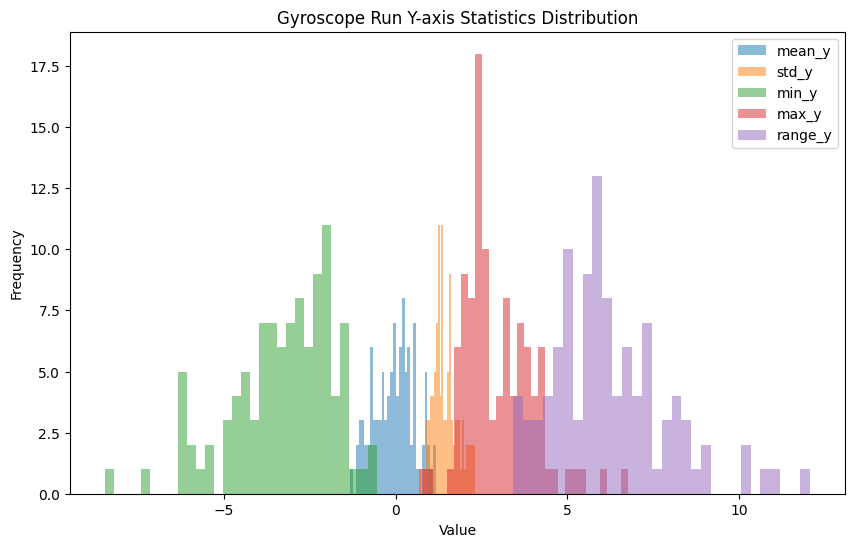

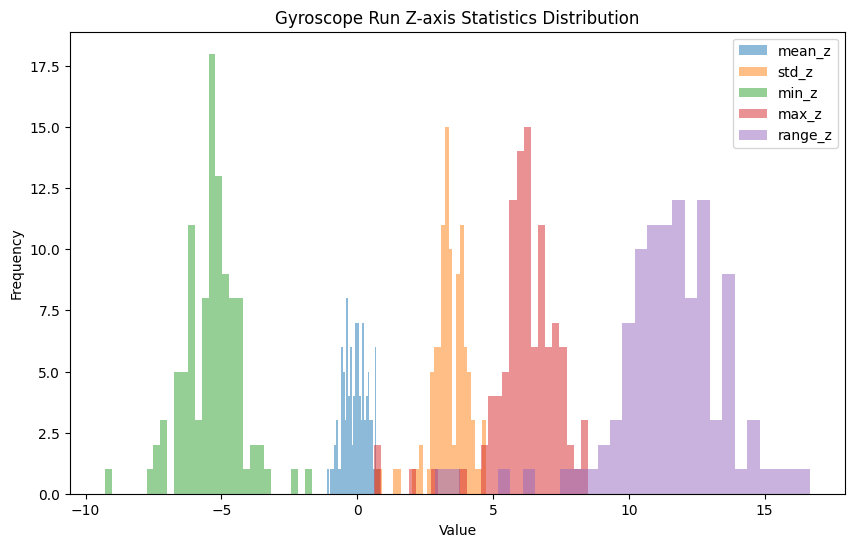

In [415]:
plot_distribution_statistics(run_accelerometer_statistics, 'Run', 'Accelerometer')
plot_distribution_statistics(run_gyroscope_statistics, 'Run', 'Gyroscope')

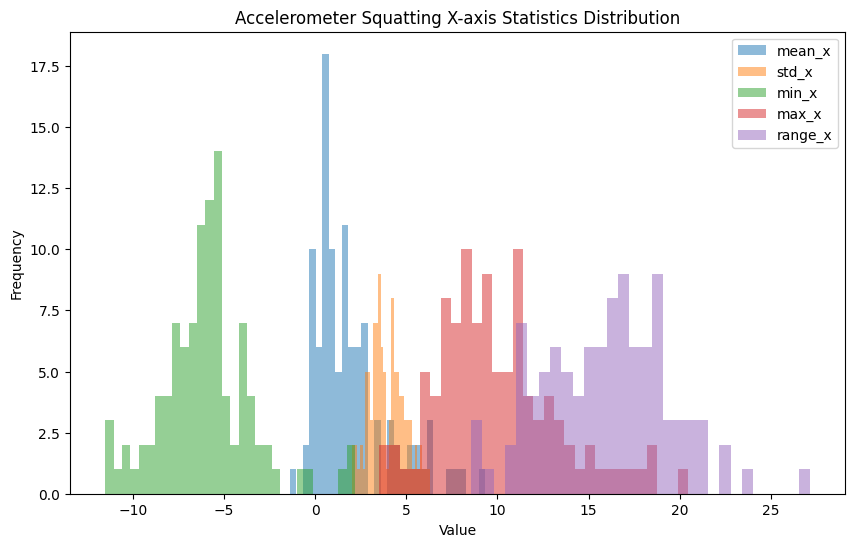

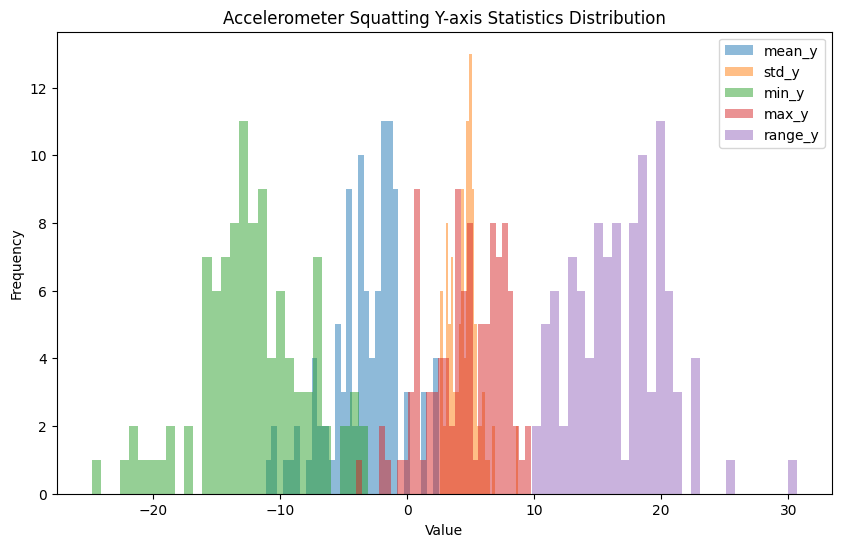

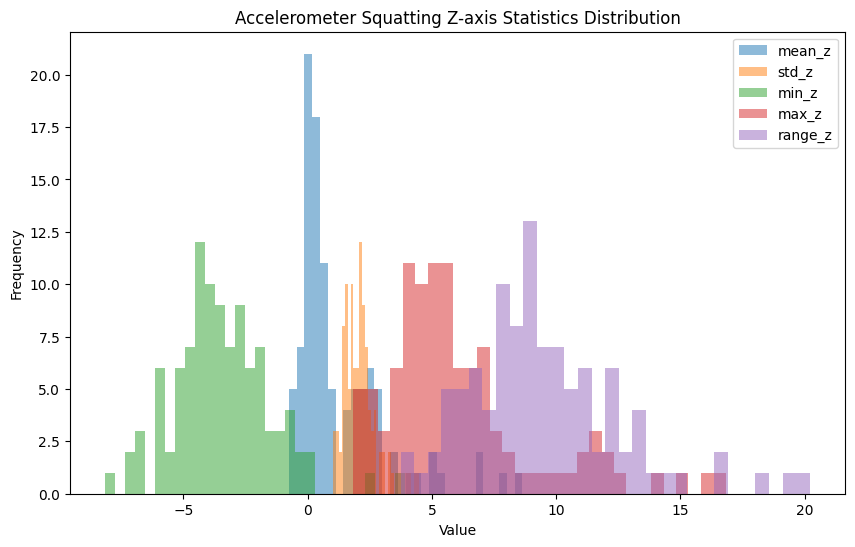

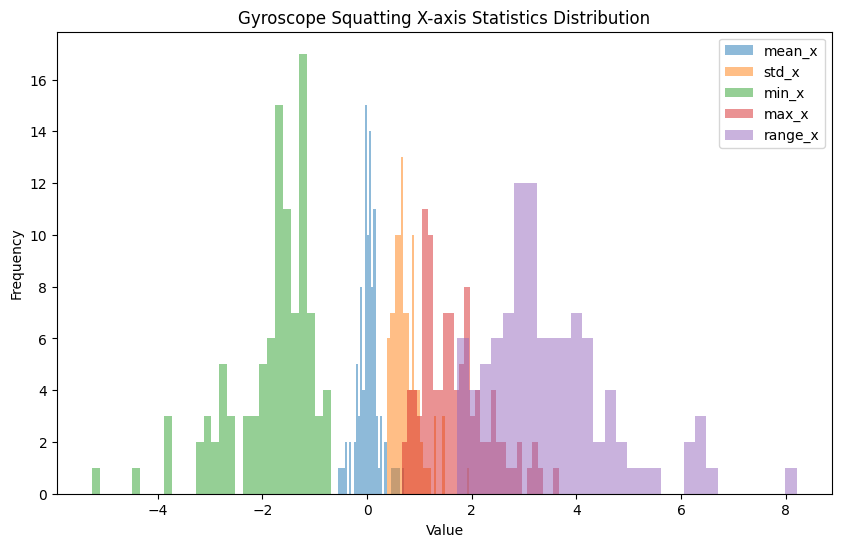

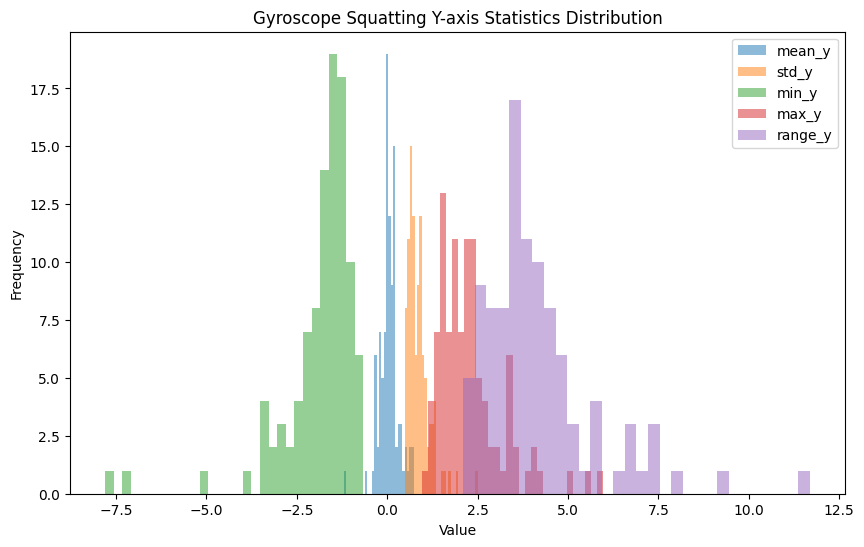

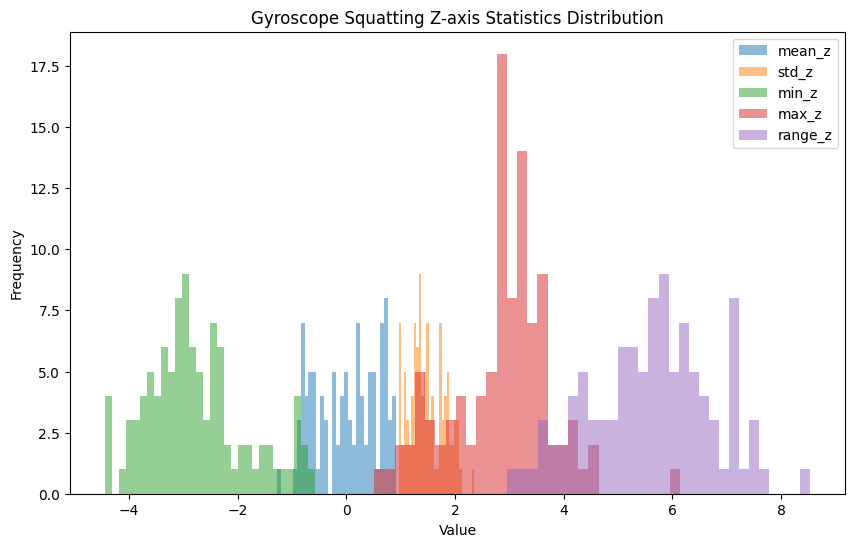

In [416]:
plot_distribution_statistics(squat_accelerometer_statistics, 'Squatting', 'Accelerometer')
plot_distribution_statistics(squat_gyroscope_statistics, 'Squatting', 'Gyroscope')

In [417]:
def params(data):
    mean = data.mean()
    std_dev = data.std()
    minimum = data.min()
    maximum = data.max()
    diff = maximum - minimum
    return mean, std_dev, minimum, maximum, diff

activities_data = {
    'walk': {'accel': walk_accelerometer_df, 'gyro': walk_gyroscope_df},
    'run': {'accel': run_accelerometer_df, 'gyro': run_gyroscope_df},
    'squat': {'accel': squatting_accelerometer_df, 'gyro': squatting_gyroscope_df}
}

for activity, data in activities_data.items():
    print(f"Stats for {activity} activity:")
    for sensor, sensor_data in data.items():
        print(f"Sensor: {sensor}")
        for axis in ['x', 'y', 'z']:
            axis_data = sensor_data[axis]
            mean, std_dev, minimum, maximum, diff = params(axis_data)
            print(f"Axis {axis}:")
            print(f"   Mean: {mean}")
            print(f"   Standard Deviation: {std_dev}")
            print(f"   Minimum: {minimum}")
            print(f"   Maximum: {maximum}")
            print(f"   Difference between max and min: {diff}")

Stats for walk activity:
Sensor: accel
Axis x:
   Mean: 0.746334705946535
   Standard Deviation: 2.983069613106829
   Minimum: -7.62643575668335
   Maximum: 10.117907524108888
   Difference between max and min: 17.744343280792236
Axis y:
   Mean: -0.9282074718530584
   Standard Deviation: 3.1762192328572922
   Minimum: -9.327537536621094
   Maximum: 7.6372971534729
   Difference between max and min: 16.964834690093994
Axis z:
   Mean: 0.8015011419647661
   Standard Deviation: 2.1569115678516755
   Minimum: -5.720694065093994
   Maximum: 10.47000789642334
   Difference between max and min: 16.190701961517334
Sensor: gyro
Axis x:
   Mean: -0.11083945925770898
   Standard Deviation: 1.062044127066018
   Minimum: -4.781242370605469
   Maximum: 3.255300998687744
   Difference between max and min: 8.036543369293213
Axis y:
   Mean: 0.06180672288451394
   Standard Deviation: 0.7480683289349298
   Minimum: -4.19725513458252
   Maximum: 5.333464622497559
   Difference between max and min: 9.530

In [418]:
def classify_activity(accel_data, gyro_data):
    
    accel_x_mean = accel_data['x'].mean()
    accel_y_mean = accel_data['y'].mean()
    accel_z_mean = accel_data['z'].mean()
    accel_x_std_dev = accel_data['x'].std()
    accel_y_std_dev = accel_data['y'].std()
    accel_z_std_dev = accel_data['z'].std()
    accel_x_diff = accel_data['x'].max() - accel_data['x'].min()
    accel_y_diff = accel_data['y'].max() - accel_data['y'].min()
    accel_z_diff = accel_data['z'].max() - accel_data['z'].min()

    
    gyro_x_mean = gyro_data['x'].mean()
    gyro_y_mean = gyro_data['y'].mean()
    gyro_z_mean = gyro_data['z'].mean()
    gyro_x_std_dev = gyro_data['x'].std()
    gyro_y_std_dev = gyro_data['y'].std()
    gyro_z_std_dev = gyro_data['z'].std()
    gyro_x_diff = gyro_data['x'].max() - gyro_data['x'].min()
    gyro_y_diff = gyro_data['y'].max() - gyro_data['y'].min()
    gyro_z_diff = gyro_data['z'].max() - gyro_data['z'].min()

    
    if (5 < accel_x_mean < 6 and 1 < accel_y_mean < 2 and 1.5 < accel_z_mean < 2.5
            and 10 < accel_x_std_dev < 11 and 10 < accel_y_std_dev < 12 and 7 < accel_z_std_dev < 8
            and 60 < accel_x_diff < 80 and 60 < accel_y_diff < 65 and 60 < accel_z_diff < 65
            and -0.5 < gyro_x_mean < -0.2 and -0.1 < gyro_y_mean < 0.1 and -0.1 < gyro_z_mean < 0.1
            and 2 < gyro_x_std_dev < 3.5 and 1.5 < gyro_y_std_dev < 2.5 and 3 < gyro_z_std_dev < 4
            and 20 < gyro_x_diff < 25 and 15 < gyro_y_diff < 18 and 17 < gyro_z_diff < 19):
        return 'run'
    elif (0.5 < accel_x_mean < 1 and -1 < accel_y_mean < -0.5 and 0.5 < accel_z_mean < 1
          and 2.5 < accel_x_std_dev < 3.5 and 3 < accel_y_std_dev < 4 and 2 < accel_z_std_dev < 3
          and 16 < accel_x_diff < 18 and 15 < accel_y_diff < 17 and 15 < accel_z_diff < 17
          and -0.2 < gyro_x_mean < -0.1 and 0.05 < gyro_y_mean < 0.1 and -0.05 < gyro_z_mean < 0.02
          and 1 < gyro_x_std_dev < 1.5 and 0.7 < gyro_y_std_dev < 0.9 and 1 < gyro_z_std_dev < 1.5
          and 7 < gyro_x_diff < 9 and 8 < gyro_y_diff < 10 and 6 < gyro_z_diff < 7):
        return 'walk'
    elif (1.9 < accel_x_mean < 2 and -3.5 < accel_y_mean < -3 and 1.2 < accel_z_mean < 1.3
      and 4 < accel_x_std_dev < 5 and 5 < accel_y_std_dev < 6 and 2.5 < accel_z_std_dev < 3
      and 30 < accel_x_diff < 32 and 33 < accel_y_diff < 35 and 24 < accel_z_diff < 26
      and 0 < gyro_x_mean < 0.05 and 0.05 < gyro_y_mean < 0.06 and 0.01 < gyro_z_mean < 0.02
      and 0.8 < gyro_x_std_dev < 0.9 and 0.9 < gyro_y_std_dev < 1 and 1.5 < gyro_z_std_dev < 1.7
      and 8 < gyro_x_diff < 9 and 13 < gyro_y_diff < 14 and 10 < gyro_z_diff < 11):
        return 'squat'
    else:
        return 'other activity'


for activity, data in activities_data.items():
    accel_data = data['accel']
    gyro_data = data['gyro']
    classification = classify_activity(accel_data, gyro_data) 
    print(f"Activity: {activity} classified as: {classification}")

Activity: walk classified as: walk
Activity: run classified as: run
Activity: squat classified as: squat
